In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

---

In [82]:
df = pd.read_csv('anime_data.csv')
df.head()

,rank,score,popularity,title,type,source,genres,demographic,rating
0,1,9.29,120,Sousou no Frieren,tv,manga,"Adventure, Drama, Fantasy",Shounen,pg_13
1,2,9.14,830,Chainsaw Man Movie: Reze-hen,movie,manga,"Action, Fantasy, Gore, Urban Fantasy",Shounen,r
2,3,9.10,3,Fullmetal Alchemist: Brotherhood,tv,manga,"Action, Adventure, Drama, Fantasy, Military",Shounen,r
3,4,9.07,14,Steins;Gate,tv,visual_novel,"Drama, Psychological, Sci-Fi, Suspense, Time T...",NaN,pg_13
4,5,9.05,21,Shingeki no Kyojin Season 3 Part 2,tv,manga,"Action, Drama, Gore, Military, Survival, Suspense",Shounen,r


In [83]:
df.isna().sum()

rank             0
score            0
popularity       0
title            0
type             0
source           0
genres           0
demographic    226
rating           0
dtype: int64

In [97]:
# filling empty data with "Undefined"
df.fillna("Undefined", inplace=True)
df.isna().sum()

rank           0
score          0
popularity     0
title          0
type           0
source         0
genres         0
demographic    0
rating         0
dtype: int64

### Genres

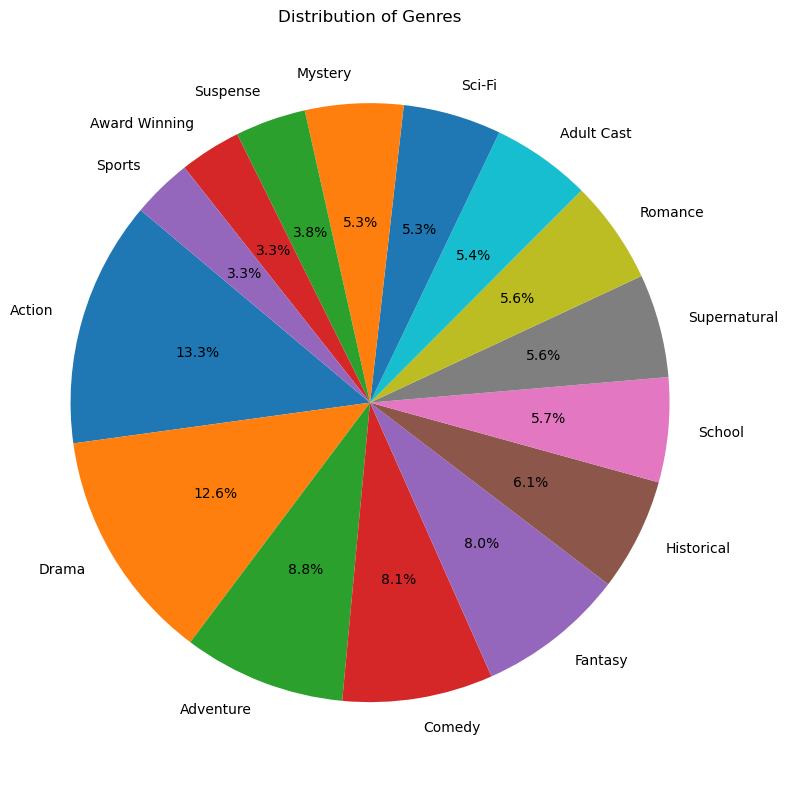

In [99]:
df = df.dropna(subset=['genres'])

split_genres = df['genres'].str.split(',')
all_genres = [genre.strip() for sublist in split_genres for genre in sublist]

genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    genre_counts.head(15),
    labels=genre_counts.head(15).index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Distribution of Genres')
plt.axis('equal')
plt.tight_layout()
plt.show()



### Demographic

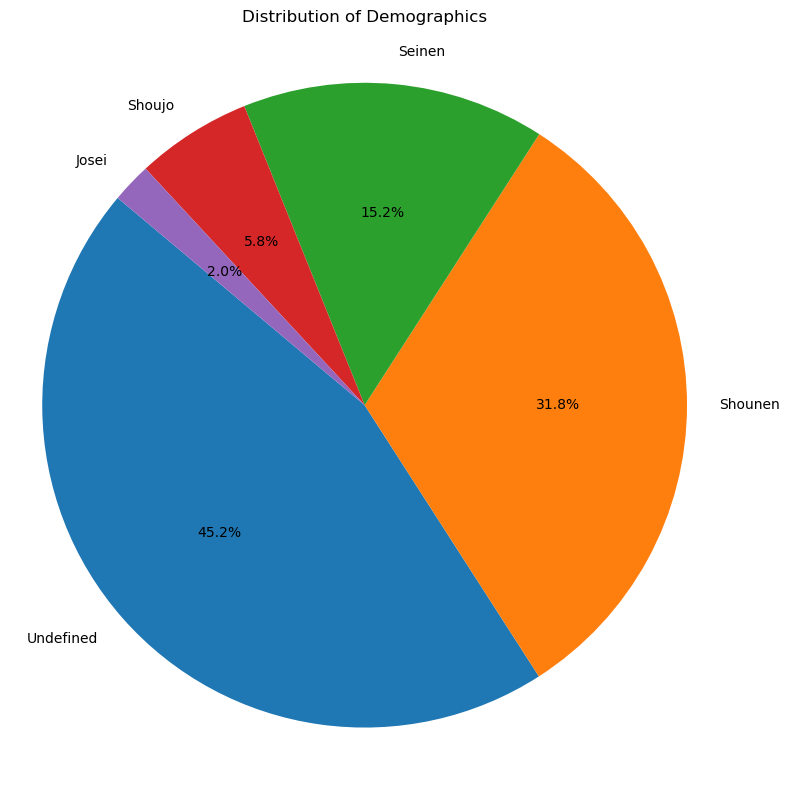

In [86]:
demographic_counts = df['demographic'].value_counts()

top = demographic_counts.head(10)

plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    top,
    labels=top.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Distribution of Demographics')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Scores per Genre

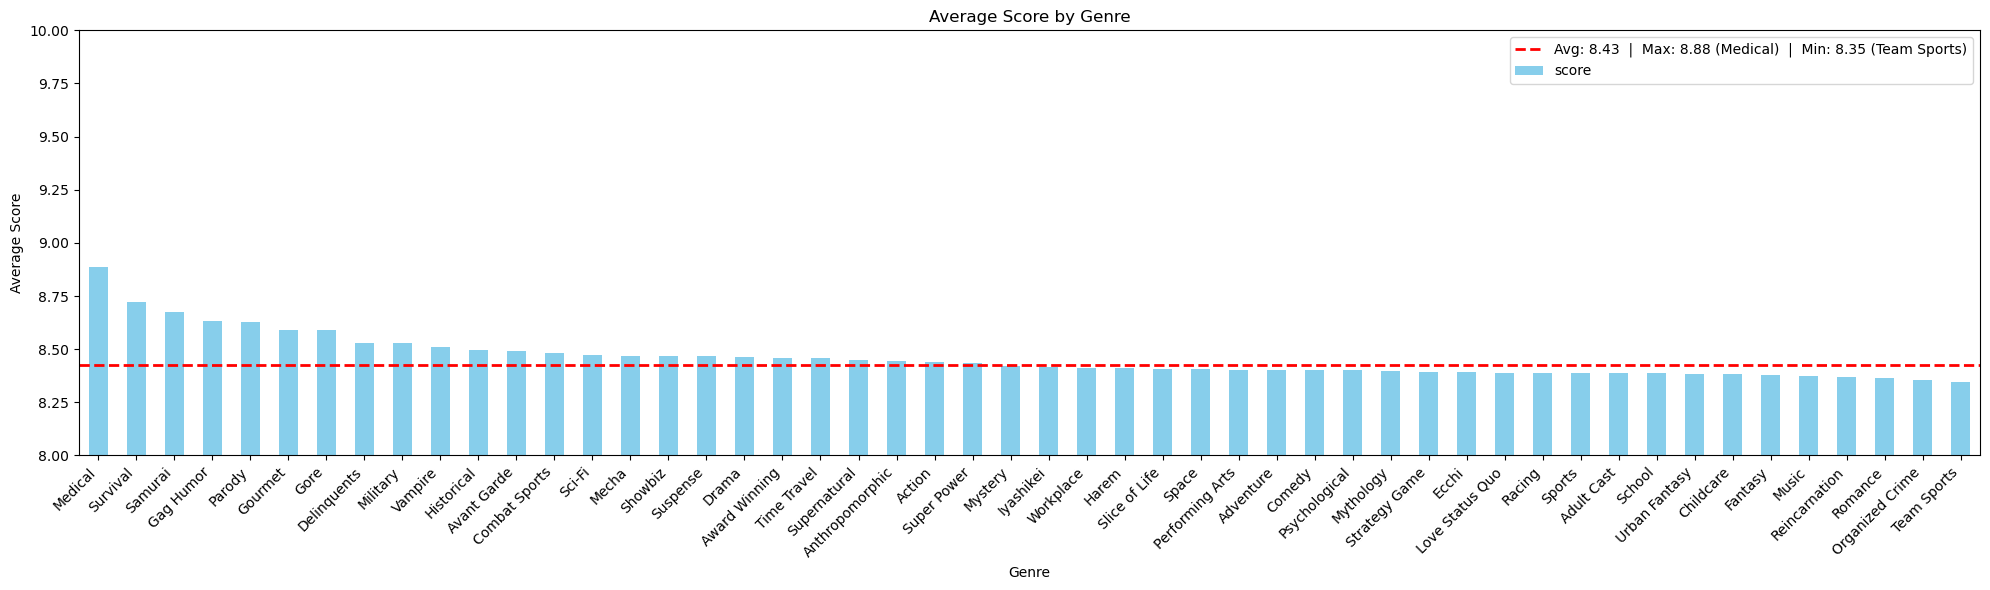

In [110]:
# Organizing the data:
df = df.dropna(subset=['score', 'genres'])
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres')
df['genres'] = df['genres'].str.strip()

genre_scores = (
    df.groupby('genres')['score']
      .mean()
      .sort_values(ascending=False)
      .head(50)
)

# setting chart:
plt.figure(figsize=(20, 6))
genre_scores.plot(kind='bar', color='skyblue')

# get the higher and lowest genres:
max_val = genre_scores.max()
min_val = genre_scores.min()

max_genre = genre_scores.idxmax()
min_genre = genre_scores.idxmin()

# line to mark the mean value:
overall_avg = df['score'].mean()
plt.axhline(
    overall_avg,
    color='red',
    linestyle='--',
    linewidth=2,
    label=(
        f'Avg: {overall_avg:.2f}  |  '
        f'Max: {max_val:.2f} ({max_genre})  |  '
        f'Min: {min_val:.2f} ({min_genre})'
    )
)
plt.legend()

# displaying the data:
plt.title('Average Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(8, 10)
plt.tight_layout()
plt.show()

### Scores per Demographic

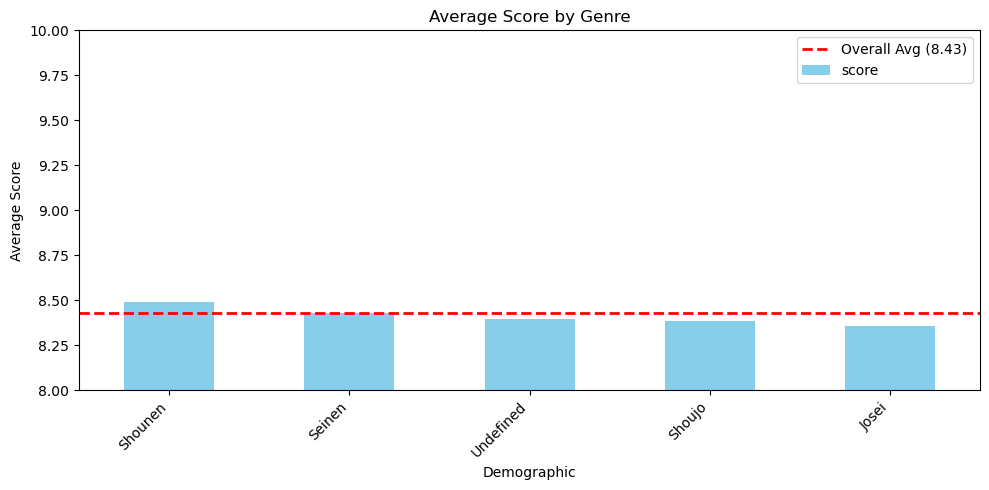

In [108]:
# Organizing the data:
df = df.dropna(subset=['score', 'demographic'])
df['demographic'] = df['demographic'].str.split(',')
df = df.explode('demographic')
df['demographic'] = df['demographic'].str.strip()

demographic_scores = (
    df.groupby('demographic')['score']
      .mean()
      .sort_values(ascending=False)
      .head(6)
)

# setting chart:
plt.figure(figsize=(10, 5))
demographic_scores.plot(kind='bar', color='skyblue')

# line to mark the mean value:
overall_avg = df['score'].mean()
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=2, label=f'Overall Avg ({overall_avg:.2f})')
plt.legend()

# displaying the data:
plt.title('Average Score by Genre')
plt.xlabel('Demographic')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(8, 10)
plt.tight_layout()
plt.show()